![Shipmnt](https://d1qb2nb5cznatu.cloudfront.net/startups/i/823885-206e3154d7d005bfd676bfcc573b088f-medium_jpg.jpg?buster=1481112387)


Here we are going to build the predictive model to predict the Cosignee from the required data. I have tried to gather a lot of training from the pdfs but still the data is having extremly low correlation

In [1]:
import pandas as pd
from pandas.io.json import json_normalize
import numpy as np
import os
import json
from matplotlib import pyplot as plt

In [2]:
df = json_normalize(json.loads(open('./Data/identify_codes.json','r').read()), 'house',['ID','OagCode'])
df.OagCode=df.OagCode.astype('int')
df.ShprCode=df.ShprCode.astype('int')
df.CneeCode=df.CneeCode.astype('int')
df.ID=df.ID.astype('int')

In [3]:
df.dtypes

CneeCode    int64
ShprCode    int64
ID          int64
OagCode     int64
dtype: object

In [4]:
x_train = df[['OagCode','ShprCode']]
y_train = df[['CneeCode']]

In [5]:
print(x_train.shape, y_train.shape)

(6293, 2) (6293, 1)


#### Correlation denotion among the data point in the daaset

We can clearly see from the below correlation that there are a number of point here in the dataset that show some linking with each other. 

Looking at the graph, the verticle and the horizontal lines clearly denote that a certain king of and certain Shipper codes are properly linked to each other. 

We can thus use a K-Nearest-Neighbour classifier here to predict the outcome of the dataset.

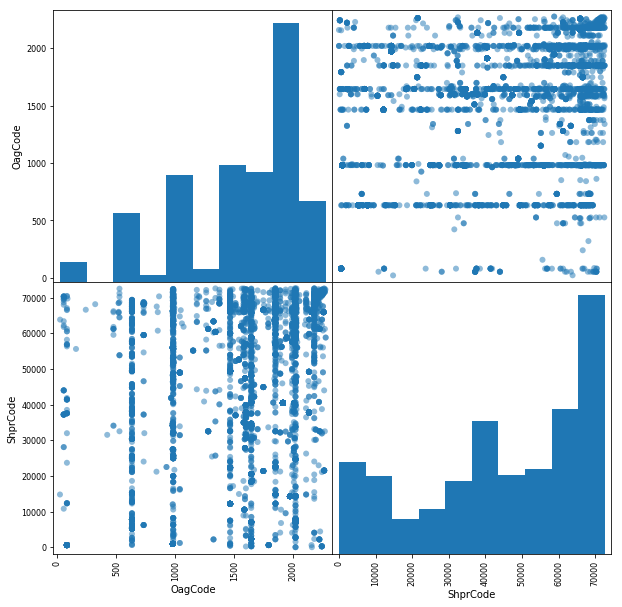

In [19]:
from matplotlib import cm

cmap = cm.get_cmap('gnuplot')
scatter = pd.plotting.scatter_matrix(x_train, marker='o', cmap=cmap, figsize=(10,10))

In [20]:
from sklearn.neighbors import KNeighborsClassifier

knn=KNeighborsClassifier()
knn.fit(x_train,  y_train)

/home/thanoz/.conda/envs/intent/lib/python3.7/site-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [21]:
knn.predict([[1644,34089],
             [1849,64028]])

array([ 8025, 99789])

The model perfectly predicts the here to the resultant here and we have a low accuracy for the forwarders who are having large variance in the dataset.

You can try yourself on the Forwarders and Shipper to predict the cosignee here.

To cross verify, lets try to plot the associated rows here:

In [29]:
df[(df.OagCode==1644) & (df.ShprCode==34089)][:5]

,CneeCode,ShprCode,ID,OagCode
10,8025,34089,2608160,1644
348,8025,34089,2654784,1644
611,8025,34089,2681297,1644
612,8025,34089,2681297,1644
718,8025,34089,2692167,1644


In [30]:
df[(df.OagCode==1849) & (df.ShprCode==64028)][:5]

,CneeCode,ShprCode,ID,OagCode
4,99789,64028,2608171,1849
5,99789,64028,2608171,1849
6,99789,64028,2608171,1849
245,99789,64028,2643861,1849
364,99789,64028,2656796,1849


#### Goto
<button onclick="location.href='https://tushardhyani.ml/Taks/html'" style='float:left;' type="button">Home</button>

<button onclick="location.href='https://tushardhyani.ml/Taks/html/EDA'" style='margin-left:33%' type="button">Eda</button>
<button onclick="location.href='https://tushardhyani.ml/Taks/html/Extract'" style='float:right;' type="button">Extract</button>

